In [1]:
import os
import sys
sys.path.append('../')

from src.utils import (
    get_Trastuzumab_H_seq,
    get_Trastuzumab_len_10_H3_seq,
    mask_seq,
    get_observed_frequnecies_from_list_of_seqs
)
from src.plotting import (
    plot_logo_plot_from_normalised_matrix
)

full_seq = get_Trastuzumab_H_seq()
seq_to_mutate = get_Trastuzumab_len_10_H3_seq()
masked_seq = mask_seq(full_seq, seq_to_mutate)

### BLOSUM

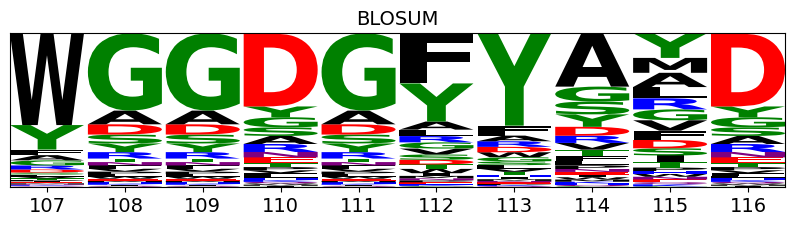

In [2]:
from src.library_design_methods.blosum import (
    get_20x20_blosum_matrix,
    get_blosum_h3_AA_probs,
    get_blosum_probs_for_seq
)

blosum_matrix      = get_20x20_blosum_matrix(45)
blosum_h3_AA_probs = get_blosum_h3_AA_probs()
blosum_seq_probs   = get_blosum_probs_for_seq(seq_to_mutate, blosum_matrix, blosum_h3_AA_probs)
plot_logo_plot_from_normalised_matrix(blosum_seq_probs, title="BLOSUM")

### AbLang

amodel.pt
hparams.json
vocab.json


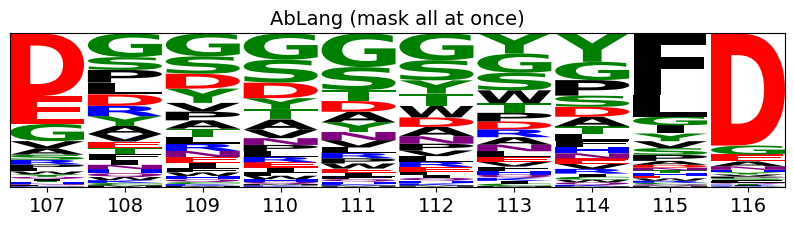

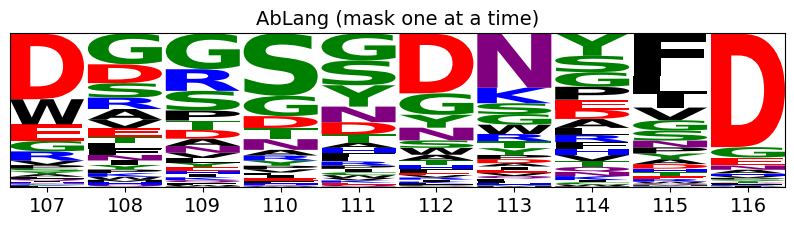

In [3]:
from src.library_design_methods.ablang import (
    get_ablang_probs_for_seq_mask_all_at_once,
    get_ablang_probs_for_seq_mask_one_at_a_time
)

# this takes 1-2 mins to download the model (first time) and run
ablang_all_seq_probs = get_ablang_probs_for_seq_mask_all_at_once(masked_seq)
plot_logo_plot_from_normalised_matrix(ablang_all_seq_probs, title="AbLang (mask all at once)")
ablang_one_seq_probs = get_ablang_probs_for_seq_mask_one_at_a_time(masked_seq, seq_to_mutate)
plot_logo_plot_from_normalised_matrix(ablang_one_seq_probs, title="AbLang (mask one at a time)")

### ESM

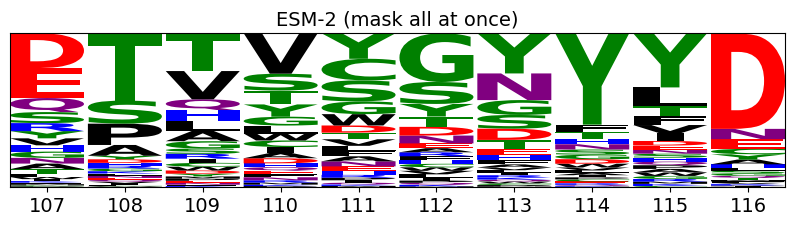

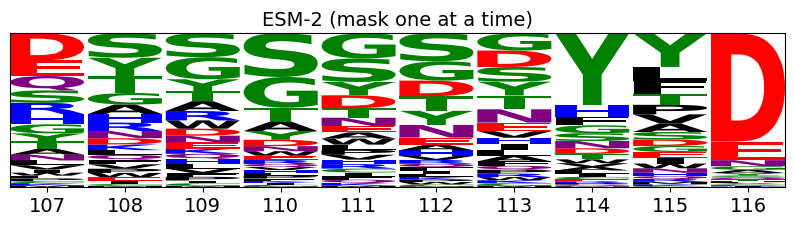

In [4]:
from src.library_design_methods.esm import (
    get_esm_probs_for_seq_mask_all_at_once,
    get_esm_probs_for_masked_residues_one_at_a_time
)

# ESM weights are large (2.5GB for 650m param model), so you may wish to download them to a separate directory
esm_download_dir = os.path.abspath("../data/esm_weights/")
esm_version="esm2_650m"
esm_all_seq_probs = get_esm_probs_for_seq_mask_all_at_once(masked_seq, esm_download_dir=esm_download_dir, esm_version=esm_version)
plot_logo_plot_from_normalised_matrix(esm_all_seq_probs, title="ESM-2 (mask all at once)")
esm_one_seq_probs = get_esm_probs_for_masked_residues_one_at_a_time(masked_seq, seq_to_mutate, esm_download_dir=esm_download_dir, esm_version=esm_version)
plot_logo_plot_from_normalised_matrix(esm_one_seq_probs, title="ESM-2 (mask one at a time)")

### ProteinMPNN

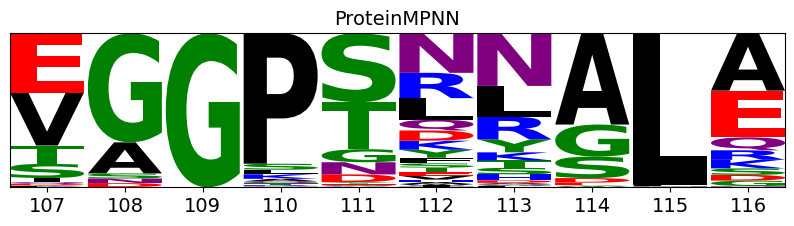

In [5]:
from src.library_design_methods.proteinmpnn import get_H3_seqs_from_fasta

# proteinmpnn must be run separately, see https://github.com/dauparas/ProteinMPNN
# outputs fixed designs, not likelihoods like the other methods
mpnn_output_fasta = os.path.abspath("../data/proteinmpnn_output/design_3000H3s_temp0pt3.fa")
mpnn_seqs = get_H3_seqs_from_fasta(output_fasta=mpnn_output_fasta)
mpnn_seq_probs = get_observed_frequnecies_from_list_of_seqs(mpnn_seqs)
plot_logo_plot_from_normalised_matrix(mpnn_seq_probs, title="ProteinMPNN")